## Predicting Customer Churn using Machine Learning Model

# Project Description

The objective of this project is to construct a machine learning (ML) model for analyzing customer attrition in the Vodafone telecom company. Leveraging any available dataset, the model will produce predictions by effectively discerning whether a customer is inclined towards churning or not. This endeavor is designed to yield significant insights into customer behavior, enabling the early identification of potential churn and facilitating strategic interventions to retain customers proactively. The anticipated outcome of this project is expected to enhance customer relationship management at Vodafone by providing a more informed and proactive approach to addressing customer churn.

The dataset encompasses information on various aspects, including:

1. Customer Churn:
The presence of customers who have left the company is indicated by the "Churn" column.

2. Services Subscribed by Customers:
Details about the services each customer has signed up for, such as phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

3. Customer Account Information:
Customer account details include tenure (how long they've been a customer), contract type, payment method, paperless billing preference, monthly charges, and total charges.

4. Demographic Information:
Demographic data includes gender, age range, and whether the customer has partners and dependents.

Additional details about the demographic information are as follows:
CustomerID: A unique identifier for each customer.
Senior Citizen: Indicates if the customer is a senior citizen (Yes/No).
Dependents: Indicates if the customer lives with any dependents (Yes/No), where dependents could be children, parents, grandparents, etc.
Tenure in Months: Represents the total number of months the customer has been with the company.
Total Charges: Calculated as the product of tenure and monthly charges.
Multiple Lines: Indicates whether the customer subscribes to multiple telephone lines with the company (Yes/No).

# Hypothesis Testing
Null Hypothesis (H0):

H0: There is no significant relationship between customer churn and the type of contract.
Alternative Hypothesis (H1):

H1: There is a significant relationship between customer churn and the type of contract.

# Analytical Questions

1. What is the overall count of customers who have discontinued their services with the company?

2. Which contract type exhibits a higher number of customers who have left the company?

3. How does the rate of customer churn change in relation to the duration of their subscription? (Visualized with a line chart)

4. Is there a correlation between the total charges accrued by customers and the type of contract they have? (Visualized with a bar chart)

5. What are the preferred payment methods?

In [ ]:
#Installing a pacakge for creating connection strings to a remote database and another package for creating an enviroment to hide sensitive config info
%pip install pyodbc  
%pip install python-dotenv 
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

## Loading and Importing Packages

In [10]:
#Importing all the necessary packages
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


import warnings 
warnings.filterwarnings('ignore')

## Load environment variables 

In [11]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

## Get the values for the credients for SQL Server

In [12]:
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

## Connecting pyoddc library and connection string

In [13]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

## Getting data from SQL Server using sql query

In [14]:
# Now use the sql query to get the data is what what you see below. 
#There was no permission to insert, delete or update the database.

query = 'SELECT * FROM LP2_Telco_churn_first_3000;'

data1 = pd.read_sql_query(query, connection)

In [15]:

data1.shape

(3000, 21)

In [16]:
data1.info

<bound method DataFrame.info of               customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0             7590-VHVEG  Female          False     True       False       1   
1             5575-GNVDE    Male          False    False       False      34   
2             3668-QPYBK    Male          False    False       False       2   
3             7795-CFOCW    Male          False    False       False      45   
4             9237-HQITU  Female          False    False       False       2   
...                  ...     ...            ...      ...         ...     ...   
2995          2209-XADXF  Female          False    False       False       1   
2996          6620-JDYNW  Female          False    False       False      18   
2997          1891-FZYSA    Male           True     True       False      69   
2998          4770-UEZOX    Male          False    False       False       2   
2999  1A1:U3001038-RQOST    Male          False     True        True      19   

      P

In [17]:
#checking for null values
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [18]:
#Providing  summary statistics 
data1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,3000,3000,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000.0,NaN,NaN,NaN,32.527333,24.637768,0.0,9.0,29.0,56.0,72.0
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2349,2,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#checking for duplicated values
data1.duplicated().sum()

0

In [20]:
#calling for the duplicated value
data1[data1.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [21]:
#converting sql data to .csv
data1.to_csv('Telco_churn_first_3000.csv')

In [ ]:

# intstall and excel(.xlsx) reader
%pip install openpyxl
import openpyxl


## Reading or Importing 2nd Dataset (.xlsx file)

In [23]:
# Read data Telco_2nd Data (.xlsx file)
data2 = pd.read_excel (r'C:\Users\ofori\OneDrive\Documents\AzubiAfricaData\LP2_Classification_Sojourn\Telco-churn-second-2000.xlsx')

In [24]:
data2.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7613-LLQFO    Male              0      No         No      12   
1     4568-TTZRT    Male              0      No         No       9   
2     9513-DXHDA    Male              0      No         No      27   
3     2640-PMGFL    Male              0      No        Yes      27   
4     3801-HMYNL    Male              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
1995  7912-SYRQT  Female              0      No         No       7   
1996  3557-HTYWR  Female              0      No         No      47   
1997  4816-JBHOV    Male              1      No         No       2   
1998  8920-NAVAY    Male              1      No         No      62   
1999  1699-TLDLZ  Female              0     Yes        Yes      16   

     PhoneService MultipleLines InternetService       OnlineSecurity  \
0             Yes           Yes     Fiber optic        

In [25]:
#checking for null values
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
# Convert (data2) from .csv to .xlsx

# Replace 'input_file.csv' with the path to your CSV file
input_file = (r'C:\Users\ofori\OneDrive\Documents\AzubiAfricaData\LP2_Classification_Sojourn\Telco_churn_first_3000.csv')

# Replace 'output_file.xlsx' with the desired output file name
output_file = 'Telco_churn_first_3000.xlsx'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Write the DataFrame to an Excel file
df.to_excel(output_file, index=False)

print(f'Data converted from {input_file} to {output_file}')


## Combining Telco_1st Data and Telco_2nd Data

In [27]:
#combine Telco_first and Telco_2nd data
datacombined2 = pd.concat([data1,data2])

In [28]:
datacombined2.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0    True      False       1   
1     5575-GNVDE    Male              0   False      False      34   
2     3668-QPYBK    Male              0   False      False       2   
3     7795-CFOCW    Male              0   False      False      45   
4     9237-HQITU  Female              0   False      False       2   
...          ...     ...            ...     ...        ...     ...   
1995  7912-SYRQT  Female              0      No         No       7   
1996  3557-HTYWR  Female              0      No         No      47   
1997  4816-JBHOV    Male              1      No         No       2   
1998  8920-NAVAY    Male              1      No         No      62   
1999  1699-TLDLZ  Female              0     Yes        Yes      16   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
0           False          None             DSL   

In [29]:
#checking for null values
datacombined2.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

## Checking for duplicated values in combined dataset (1 & 2)

In [30]:
#checking for duplicated values
datacombined2.duplicated().sum()

0

In [31]:
dataframe = pd.DataFrame(datacombined2)



In [32]:
# Replace 'output_file.xlsx' with the desired name for your Excel file
excel_file_path = 'churndata.xlsx'

# Save the DataFrame to an Excel file
dataframe.to_excel(excel_file_path, index=False)

print(f'DataFrame successfully saved to Excel file at: {excel_file_path}')

DataFrame successfully saved to Excel file at: churndata.xlsx


Converting combined data2 to .csv

In [33]:
import pandas as pd

# Replace 'your_input_file.xlsx' with the path to your Excel file
input_excel_file = r'C:\Users\ofori\OneDrive\Documents\AzubiAfricaData\LP2_Classification_Sojourn\churndata.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(input_excel_file)

# Replace 'your_output_file.csv' with the desired name for your CSV file
output_csv_file = 'churn_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_csv_file, index=False)

print(f'Conversion complete. CSV file saved at: {output_csv_file}')


Conversion complete. CSV file saved at: churn_data.csv


Load Data

In [34]:
df = pd.read_csv('churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85000038146973,0.0
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,0.0
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,1.0
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,0.0
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.6499938964844,1.0


Dropping Column 0 (Customer ID)

In [35]:
del df['customerID']

Checking for Duplicate

In [36]:
df.duplicated().sum()

10

In [37]:
df.drop_duplicates(inplace=True)

Rechecking duplicates

In [108]:
df.duplicated().sum()

0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4990 non-null   object 
 1   SeniorCitizen     4990 non-null   int64  
 2   Partner           4990 non-null   object 
 3   Dependents        4990 non-null   object 
 4   tenure            4990 non-null   int64  
 5   PhoneService      4990 non-null   object 
 6   MultipleLines     4721 non-null   object 
 7   InternetService   4990 non-null   object 
 8   OnlineSecurity    4344 non-null   object 
 9   OnlineBackup      4344 non-null   object 
 10  DeviceProtection  4344 non-null   object 
 11  TechSupport       4344 non-null   object 
 12  StreamingTV       4344 non-null   object 
 13  StreamingMovies   4344 non-null   object 
 14  Contract          4990 non-null   object 
 15  PaperlessBilling  4990 non-null   object 
 16  PaymentMethod     4990 non-null   object 
 17  

Checking for Missing Values or Null 

In [39]:
df.isna().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       646
OnlineBackup         646
DeviceProtection     646
TechSupport          646
StreamingTV          646
StreamingMovies      646
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               1998
dtype: int64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,4990.0,0.159920,0.366568,0.00,0.000000,0.000000,0.00,1.00
tenure,4990.0,32.320240,24.620341,0.00,9.000000,29.000000,56.00,72.00
MonthlyCharges,4990.0,64.855972,30.117966,18.25,35.612499,70.449998,89.95,118.75
Churn,2992.0,0.259693,0.438539,0.00,0.000000,0.000000,1.00,1.00


In [41]:
df.describe(include='object').T

,count,unique,top,freq
gender,4990,2,Male,2526
Partner,4990,4,False,1531
Dependents,4990,4,False,2063
PhoneService,4990,4,True,2724
MultipleLines,4721,5,False,1430
InternetService,4990,3,Fiber optic,2190
OnlineSecurity,4344,5,False,1476
OnlineBackup,4344,5,False,1318
DeviceProtection,4344,5,False,1294
TechSupport,4344,5,False,1474


## Univariate Analysis

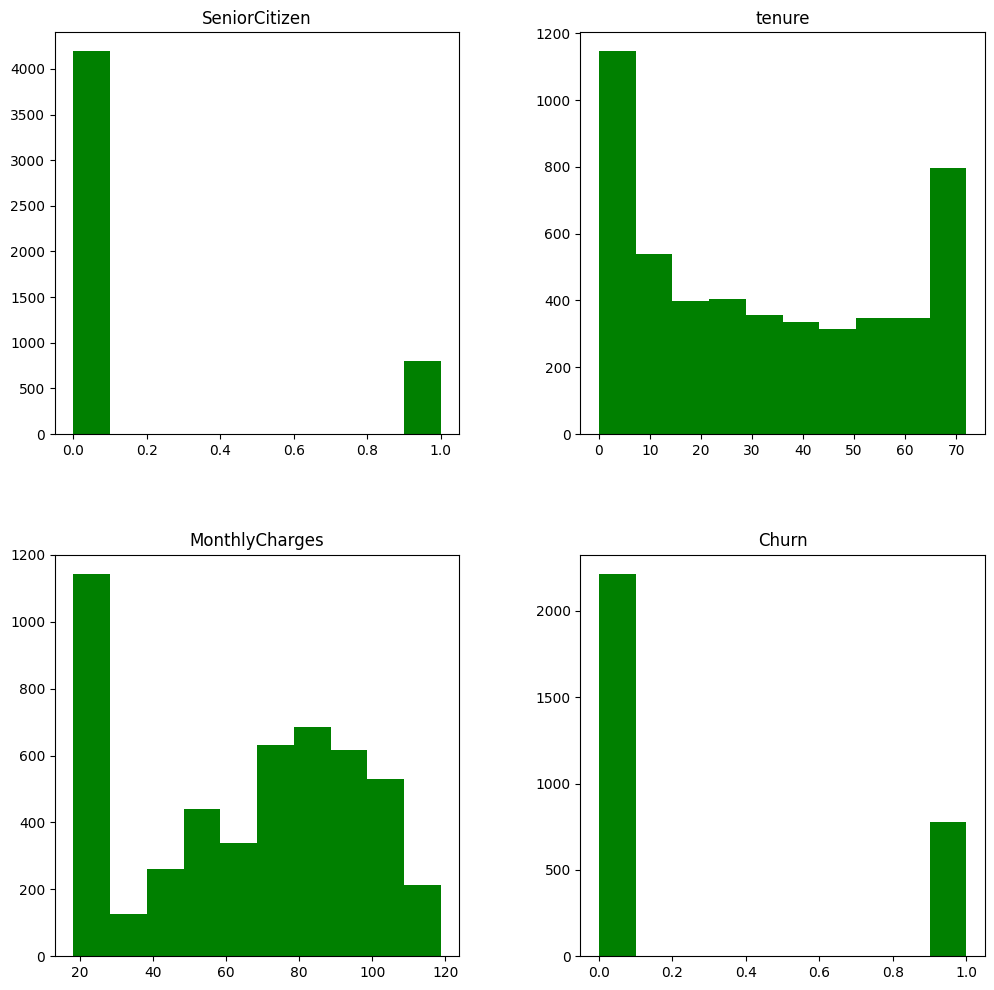

In [42]:
df.hist(figsize=(12,12), grid = False, color = "green")
plt.show()

<Axes: >

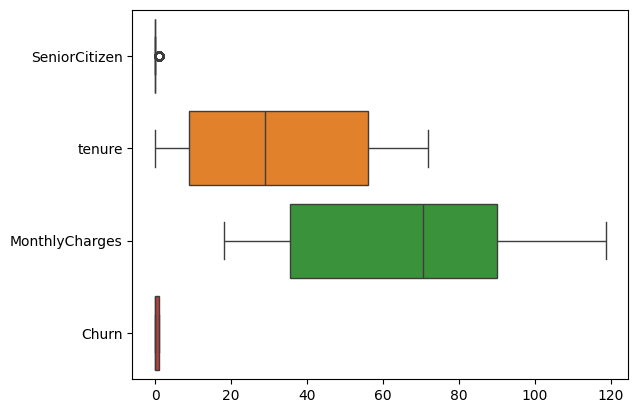

In [43]:
sns.boxplot(data=df,orient='h')

## Bi-variate Analysis

In [45]:
correlation = df.corr(numeric_only=True)
correlation

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.009182,0.219147,0.143183
tenure,0.009182,1.000000,0.242255,-0.349208
MonthlyCharges,0.219147,0.242255,1.000000,0.212979
Churn,0.143183,-0.349208,0.212979,1.000000


<Axes: >

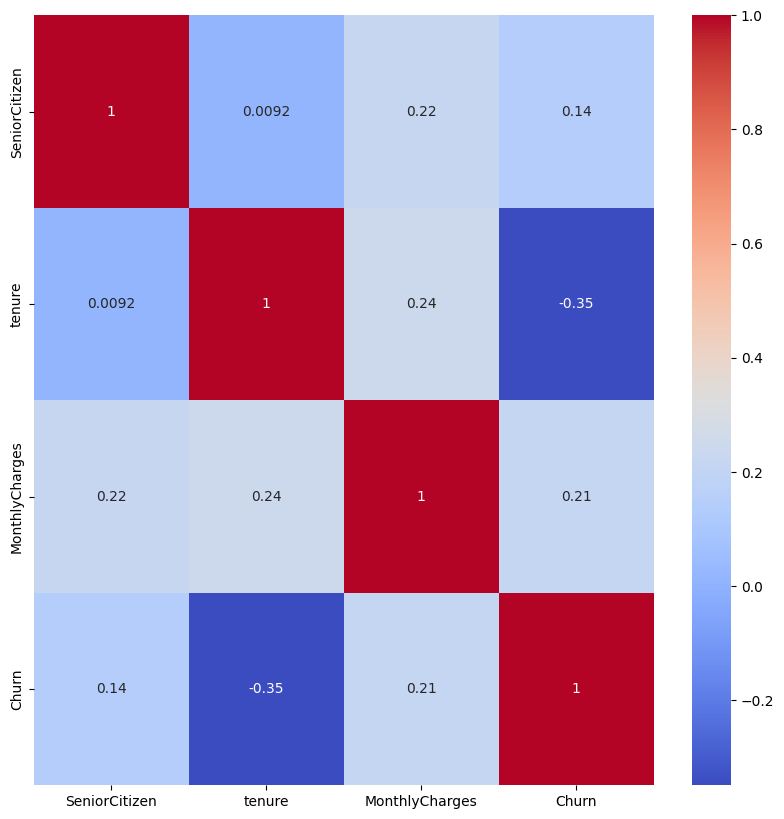

In [46]:
plt.figure(figsize = (10, 10))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')

## Multivariate Analyis


In [117]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [118]:
all_column_data_types = df.dtypes

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

<Figure size 1500x700 with 0 Axes>

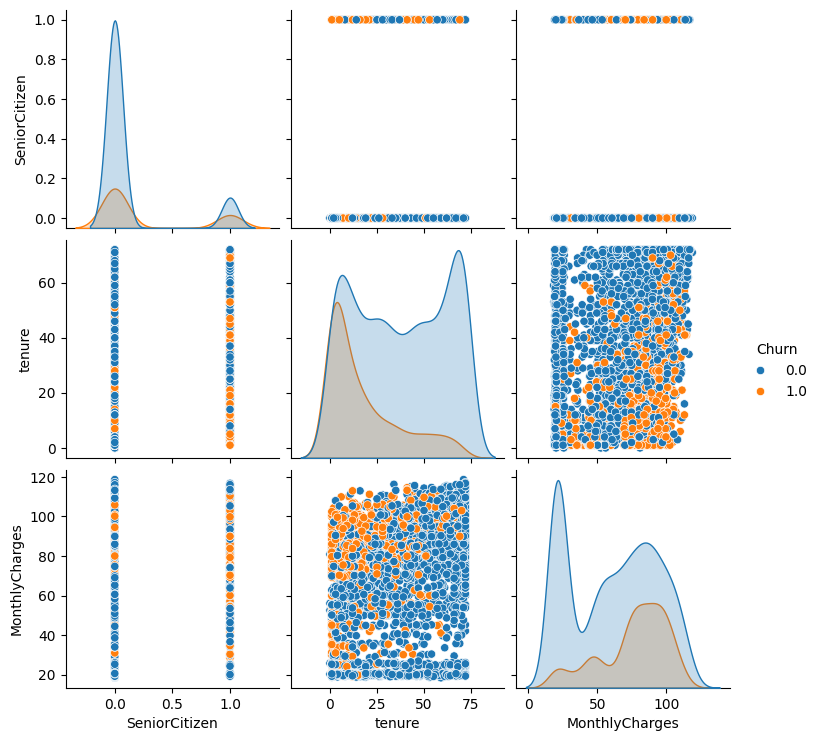

In [119]:
data = df[['SeniorCitizen','tenure','Churn','MonthlyCharges']]
plt.figure(figsize=(15,7))
sns.pairplot(data, hue = 'Churn')
plt.show()

<Figure size 1500x700 with 0 Axes>

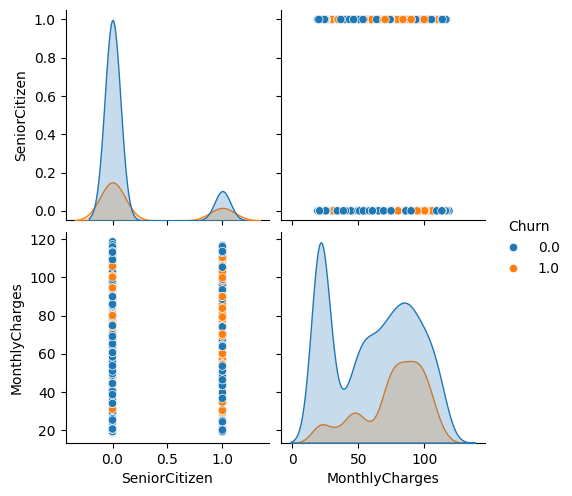

In [120]:
data = df[['SeniorCitizen','Churn','MonthlyCharges']]
plt.figure(figsize=(15,7))
sns.pairplot(data, hue = 'Churn')
plt.show()

## Hypothesis Testing

In [48]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
# Create a contingency table
contingency_table = pd.crosstab(df['Churn'], df['Contract'])

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set my significance level
alpha = 0.05

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between customer churn and the type of contract.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between customer churn and the type of contract.")


Reject the null hypothesis. There is a significant relationship between customer churn and the type of contract.


## Data Cleaning

Replace True with Yes and False with No

In [49]:
df.replace({'True': 'Yes'}, inplace=True)


In [50]:
df.replace({'False': 'Yes'}, inplace=True)

In [123]:
df.replace({'No internet service': 'Yes'}, inplace=True)

In [51]:
# Calculate the mode of the column
mode_value = df['MultipleLines'].mode()[0]

# Replace NaN values with the mode
df['MultipleLines'].fillna(mode_value, inplace=True)

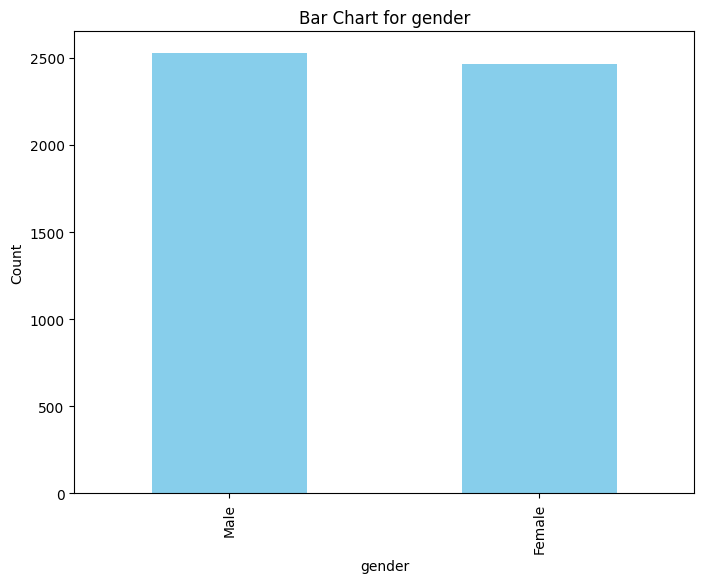

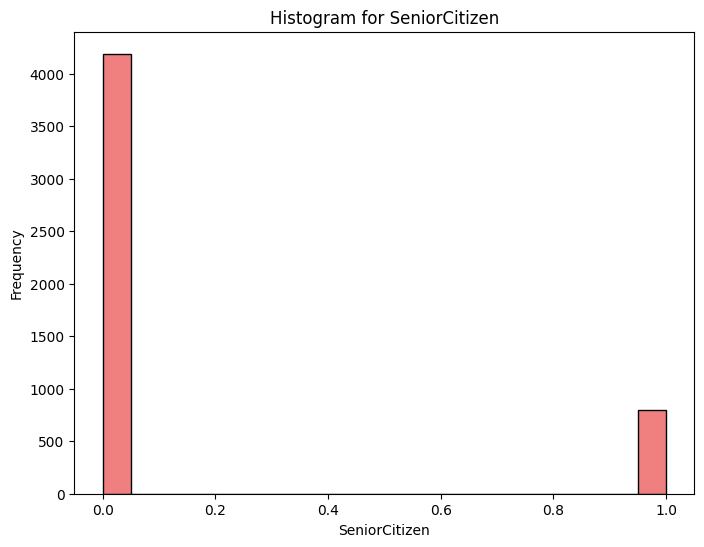

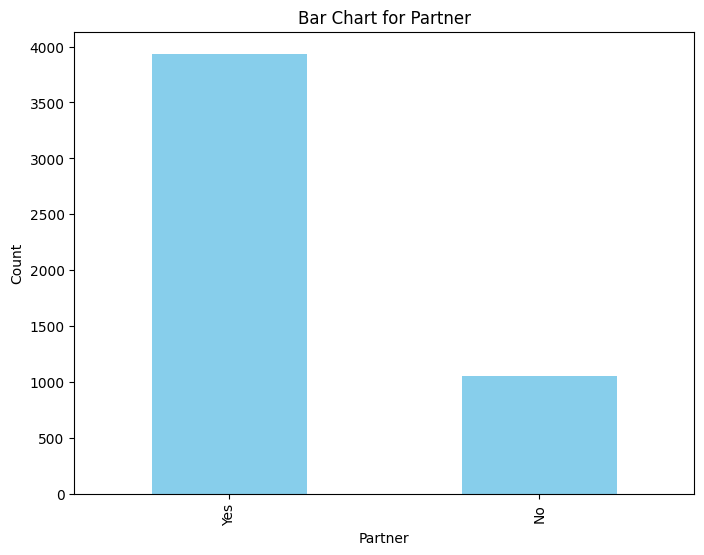

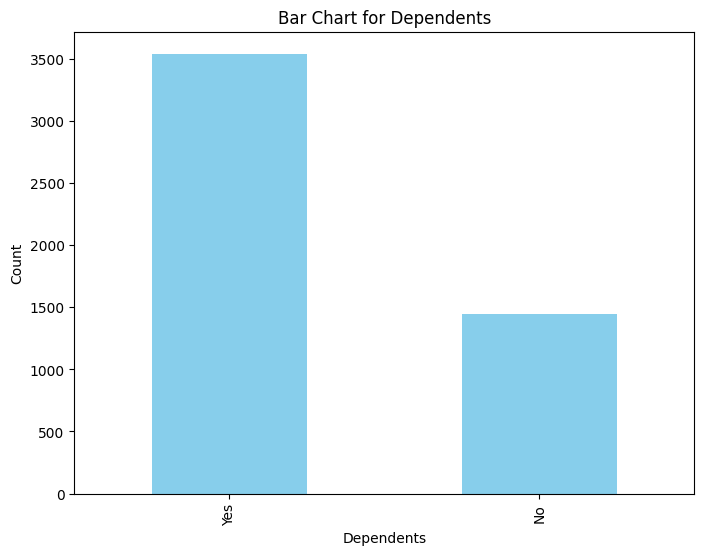

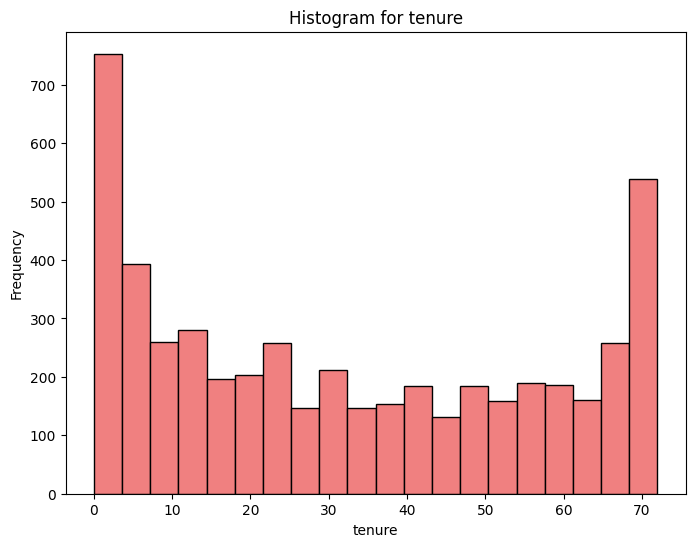

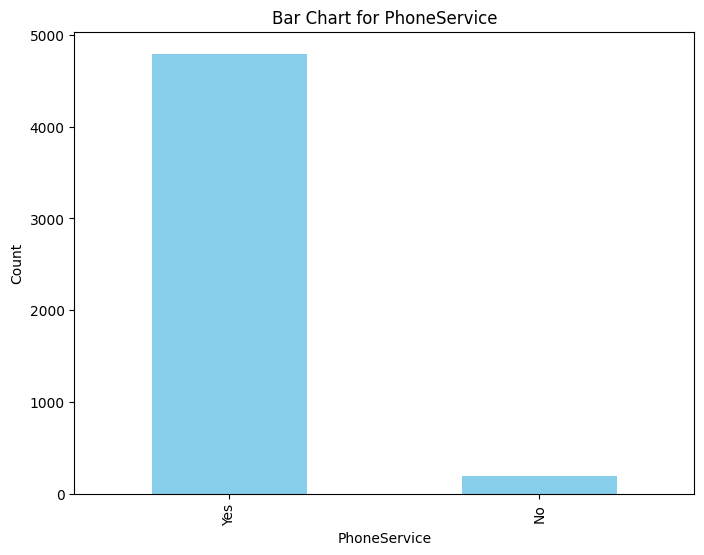

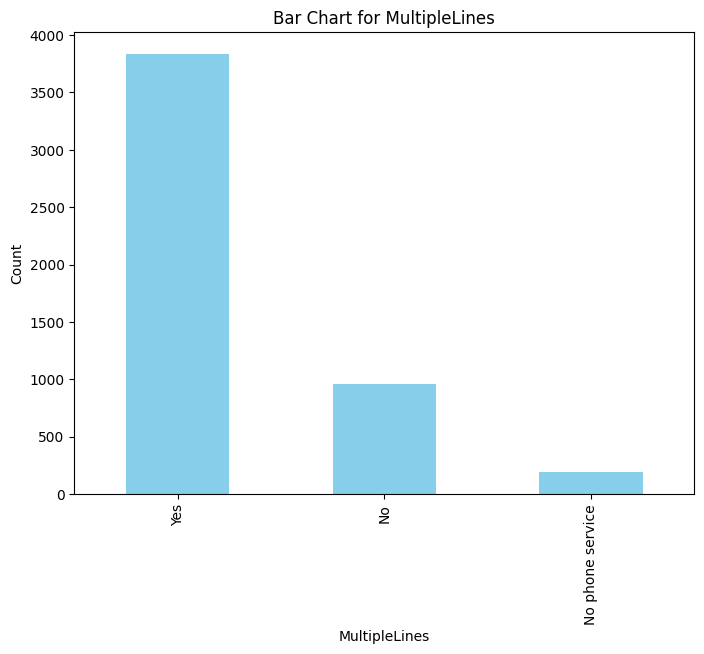

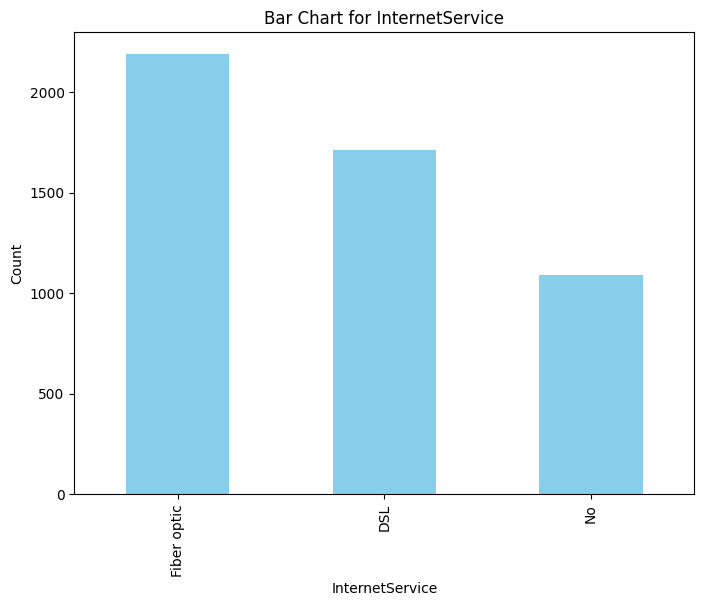

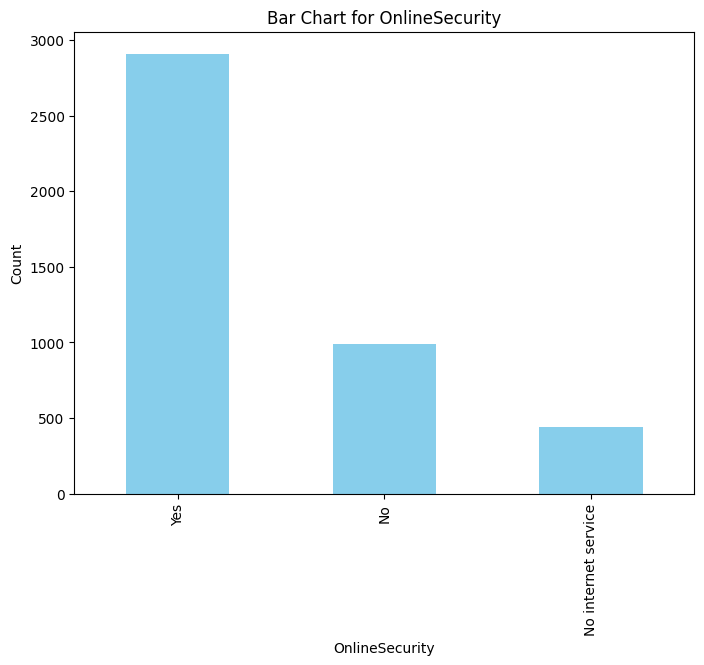

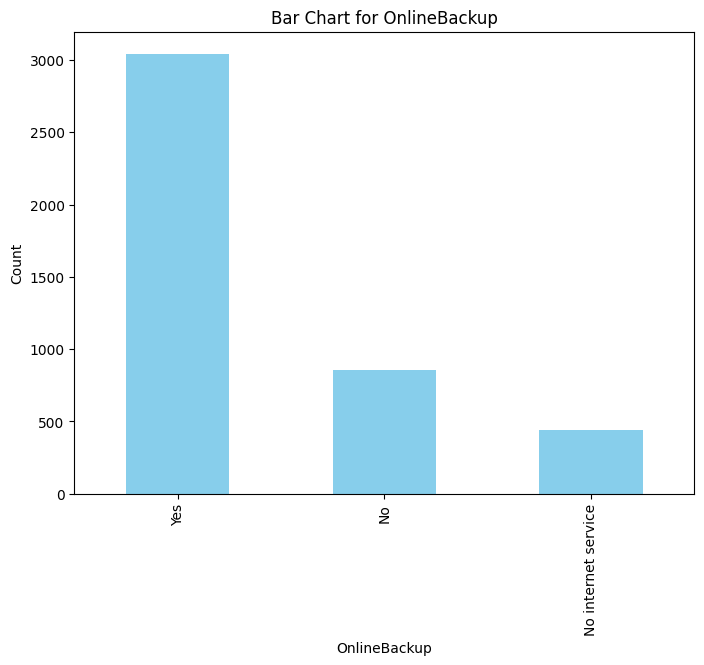

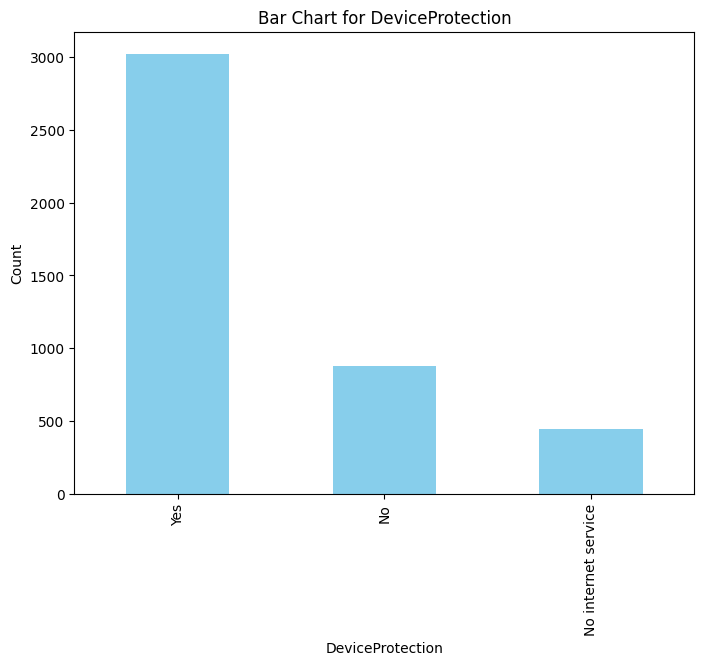

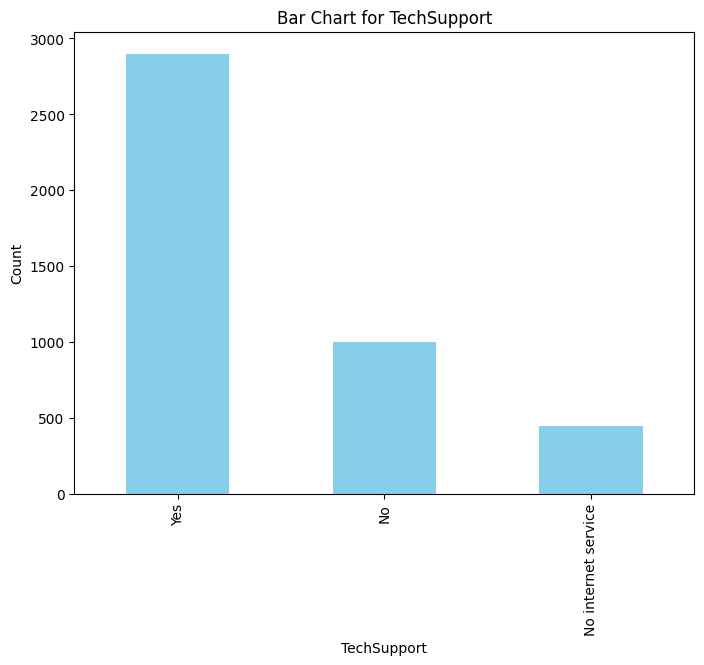

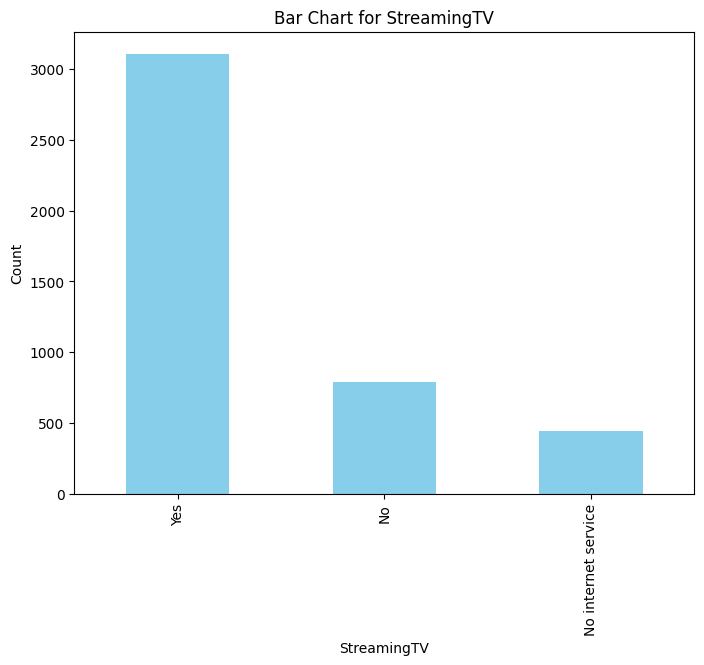

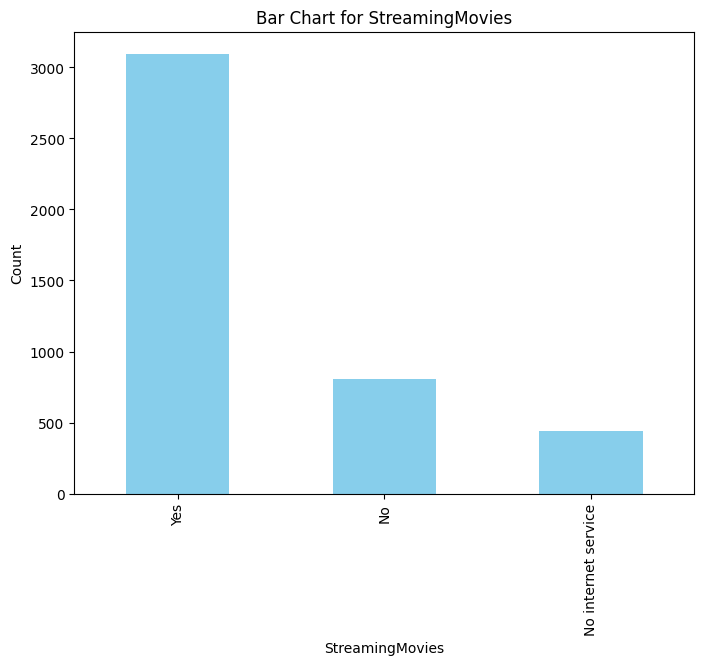

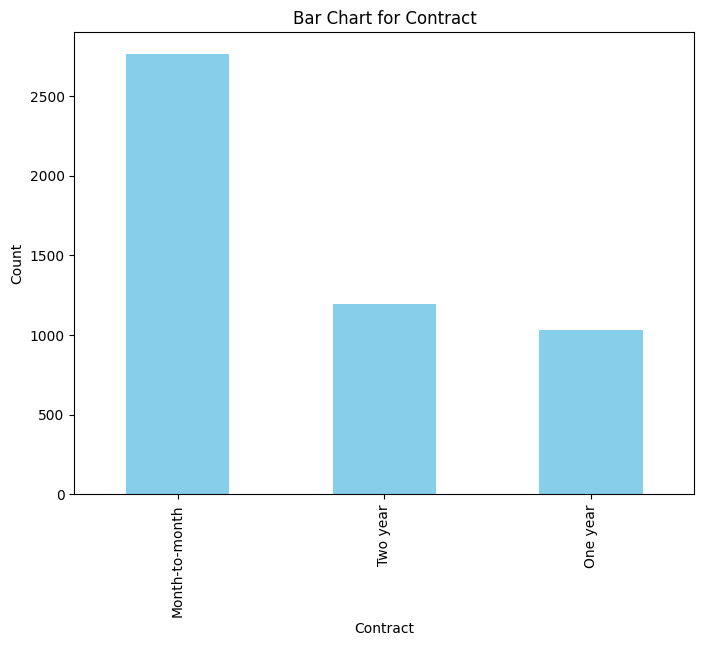

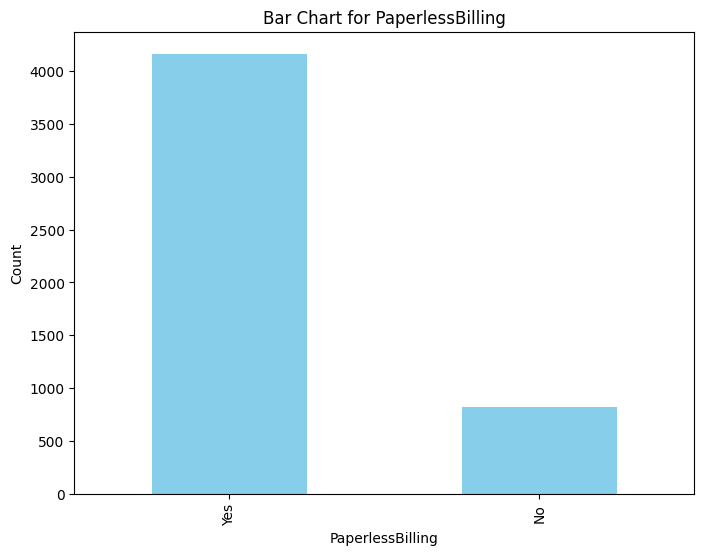

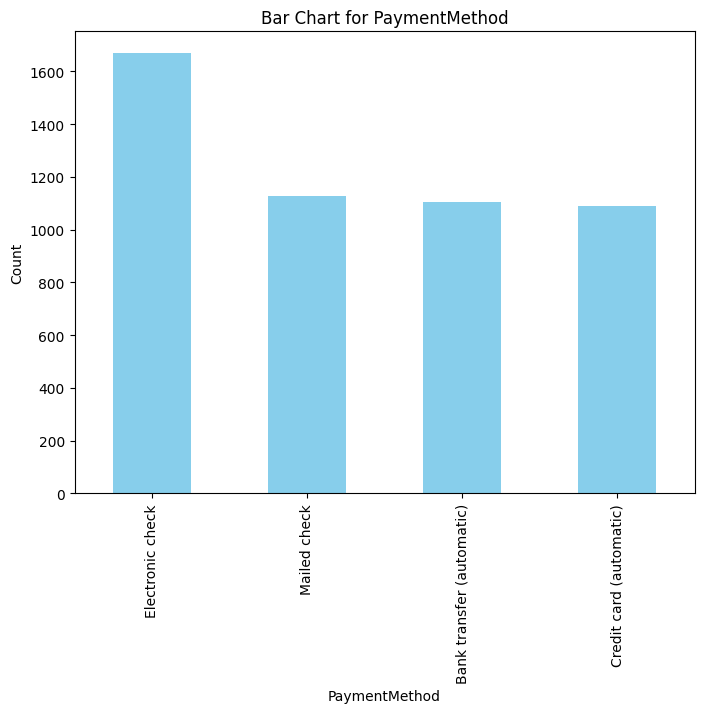

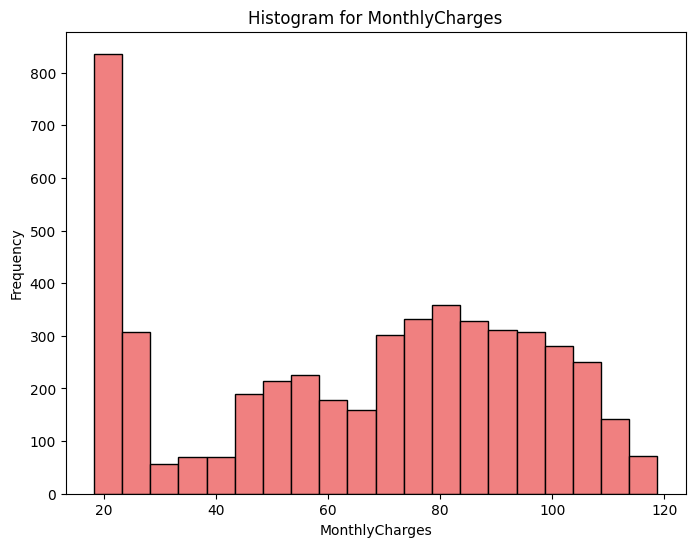

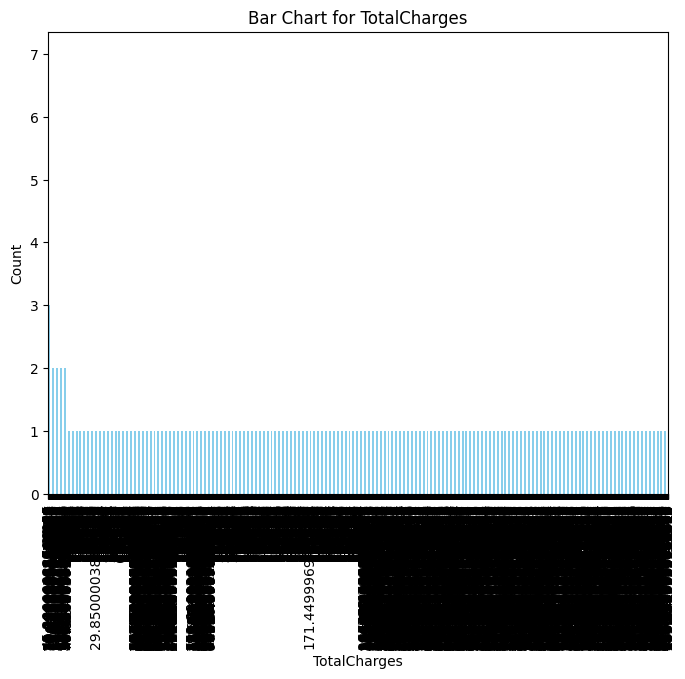

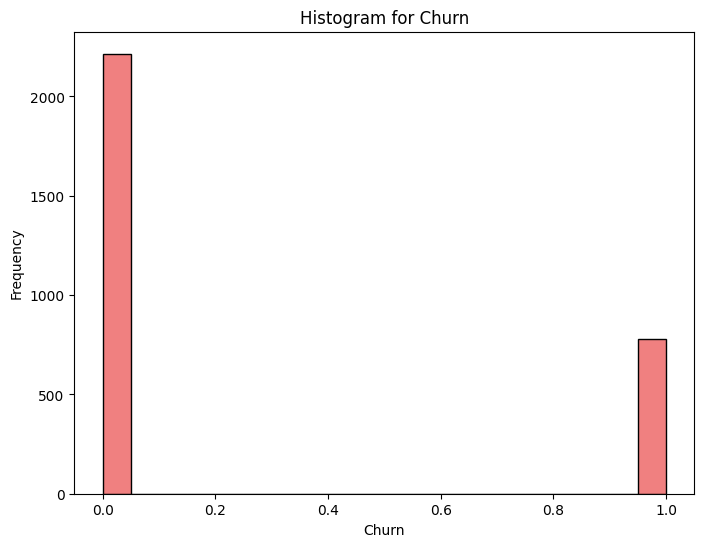

In [52]:
 # Display bar charts for all variables
for column in df.columns:
    if df[column].dtype == 'object':
        # Bar chart for categorical variables
        plt.figure(figsize=(8, 6))
        df[column].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Bar Chart for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
    else:
        # Histogram for numerical variables
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20, color='lightcoral', edgecolor='black')
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Data Preparation


Split data into input(X) and target(y) features


In [125]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,29.850000,29.85000038146973,0.0
1,Male,0,Yes,Yes,34,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,56.950001,1889.5,0.0
2,Male,0,Yes,Yes,2,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,1.0
3,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),42.299999,1840.75,0.0
4,Female,0,Yes,Yes,2,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,70.699997,151.6499938964844,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95,NaN
4996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3,NaN
4997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7,NaN
4998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35,NaN


In [126]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,29.850000,29.85000038146973,0.0
1,Male,0,Yes,Yes,34,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,56.950001,1889.5,0.0
2,Male,0,Yes,Yes,2,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,1.0
3,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),42.299999,1840.75,0.0
4,Female,0,Yes,Yes,2,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,70.699997,151.6499938964844,1.0


Replacing NaN values with median for Churn

In [127]:
Churn2 = df['Churn'].mode().iloc[0]  # Access the first element (mode)
df['Churn'].fillna(Churn2, inplace=True)


In [128]:
## Churn2 = df['Churn'].mode()

### df['Churn'].fillna(Churn2, inplace=True) ####

In [129]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,29.850000,29.85000038146973,0.0
1,Male,0,Yes,Yes,34,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,56.950001,1889.5,0.0
2,Male,0,Yes,Yes,2,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,1.0
3,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),42.299999,1840.75,0.0
4,Female,0,Yes,Yes,2,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,70.699997,151.6499938964844,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95,0.0
4996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3,0.0
4997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7,0.0
4998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35,0.0


In [130]:
y = df['Churn']

## Split data into training and evaluation

In [131]:
# separating the target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [132]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [133]:
# Dataframe for X_train
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2085,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,93.199997,2931
677,Female,0,Yes,Yes,2,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,34.700001,62.25
1257,Female,1,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,34.200001,1596.599975585938
3143,Male,0,Yes,Yes,13,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,72.800000,930.05
4566,Male,0,Yes,No,68,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.300000,6754.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,Male,0,Yes,Yes,29,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,35.599998,1072.599975585938
132,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),50.549999,3260.10009765625
3629,Male,0,Yes,Yes,17,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,25.150000,412.6
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.650000,2070.75


In [151]:
# Dataframe for X_test
X_test

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_994.5499877929688,TotalCharges_994.7999877929688,TotalCharges_996.4500122070312,TotalCharges_996.8499755859375,TotalCharges_996.9500122070312,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9000244140625
4737,0,72,115.500000,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2321,1,65,95.449997,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3676,0,30,70.400000,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1213,0,69,20.200001,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3039,1,72,64.450000,False,True,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0,46,105.200000,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4553,0,72,115.800000,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4038,0,60,20.600000,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4916,0,2,79.550000,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [152]:
# dataframe for y_train (Churn)
y_train

1453    0.0
3767    0.0
4412    0.0
879     0.0
2566    0.0
       ... 
4434    0.0
466     0.0
3099    0.0
3779    0.0
860     0.0
Name: Churn, Length: 3992, dtype: float64

In [153]:
# dataframe for y_test (Churn)
y_test

4737    0.0
2321    0.0
3676    0.0
1213    0.0
3039    0.0
       ... 
3534    0.0
4553    0.0
4038    0.0
4916    0.0
191     1.0
Name: Churn, Length: 998, dtype: float64

In [154]:
# variable types in dataframe
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

## Feature Enginnering

In [155]:
# x dataframe information
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Columns: 4839 entries, SeniorCitizen to TotalCharges_999.9000244140625
dtypes: bool(4836), float64(1), int64(2)
memory usage: 23.2 MB


In [156]:
# Calling out numeric data in X 
numeric_column = X.select_dtypes(include='number').columns
numeric_column

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [157]:
# Calling out categorical data in X
categorical_column = X.select_dtypes(include='object').columns
categorical_column

Index([], dtype='object')

## Pipelines

In [159]:

numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])

# Apply OneHotEncoder to each categorical column
categorical_transformers = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numeric_pipeline, numeric_column),
    ('categorical_pipeline', categorical_transformers, categorical_column),
])


Label Encoding

In [160]:

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)





## Model Testing

Decision Tree Pipleline

In [161]:
from sklearn.tree import DecisionTreeClassifier



decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
decision_tree_pipeline.fit(X_train, y_train_encoded) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

Evaluation and Classification Report

In [171]:
predict = decision_tree_pipeline.predict(X_test)  

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       838
           1       0.63      0.59      0.61       160

    accuracy                           0.88       998
   macro avg       0.78      0.76      0.77       998
weighted avg       0.88      0.88      0.88       998



Randon Forest Classifier pipleline

In [173]:
# Create a Random Forest Classifier pipeline
Random_Forest_Classifier_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


Random_Forest_Classifier_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

Evaluation and Classification

In [178]:
# Assuming X_test and y_test are your testing data and labels
y_pred = Random_Forest_Classifier_pipeline.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Accuracy: 0.82
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       838
         1.0       0.40      0.29      0.34       160

    accuracy                           0.82       998
   macro avg       0.64      0.60      0.62       998
weighted avg       0.80      0.82      0.80       998



Support Vector Machines (SVM)

In [164]:
from sklearn.svm import SVC

SVM_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # You can customize the SVC parameters as needed
])

# Fit the SVM pipeline on the training data
SVM_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC(random_state=42))])

Evaluation and Classification

In [179]:
# Assuming X_test and y_test are your testing data and labels
y_pred = SVM_pipeline.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Accuracy: 0.84
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       838
         1.0       0.00      0.00      0.00       160

    accuracy                           0.84       998
   macro avg       0.42      0.50      0.46       998
weighted avg       0.71      0.84      0.77       998



Linear Discriminant Analysis (LDA)

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())  # LDA does not require random_state
])

# Fit the LDA pipeline on the training data
LDA_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', LinearDiscriminantAnalysis())])

In [180]:
# Assuming X_test and y_test are your testing data and labels
y_pred = LDA_pipeline.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Accuracy: 0.84
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       838
         1.0       0.50      0.01      0.02       160

    accuracy                           0.84       998
   macro avg       0.67      0.51      0.47       998
weighted avg       0.79      0.84      0.77       998



## Compare Models

ML - Unbalanced Pipline

In [ ]:
import pandas as pd 

In [181]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state = 42)),
    ('SVC', SVC(random_state=42,probability=True)),
    ('Random Forest',RandomForestClassifier(random_state=42)),
    ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),

]

Train on Unbalanced Data

In [182]:
unbalanced_metrics = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_Score'])


for model_name, classifier in models:


    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
   
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)


    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)


   


    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    Accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['precision']
    f1_score = metrics['weighted avg']['precision']
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name,Accuracy,precision,recall,f1_score]


In [183]:
unbalanced_metrics

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.804609,0.803125,0.803125,0.803125
1,SVC,0.839679,0.705061,0.705061,0.705061
2,Random Forest,0.817635,0.796086,0.796086,0.796086
3,LinearDiscriminantAnalysis,0.839679,0.786370,0.786370,0.786370


In [ ]:
! pip install imbalanced-learn

### Train and compare balanced dataset - SMOTE

In [196]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

import pandas as pd


smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

for model_name, classifier in models:
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier),
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_test)

    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']

    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

In [197]:
smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.755511,0.795444,0.755511,0.772124
1,SVC,0.675351,0.849353,0.675351,0.718463
2,Random Forest,0.761523,0.798634,0.761523,0.777023
3,LinearDiscriminantAnalysis,0.705411,0.846730,0.705411,0.743501


Feature Importance and Selection

In [198]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

selection = SelectKBest(mutual_info_classif,k='all')

In [199]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline  # Import the Pipeline class
import pandas as pd

fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipeline = {}

for model_name, classifier in models:

    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance',selection),
        ('classifier', classifier),
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)
    all_pipeline[model_name] = pipeline


    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_test)

    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]

fi_smote_df 



,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.755511,0.795444,0.755511,0.772124
1,SVC,0.675351,0.849353,0.675351,0.718463
2,Random Forest,0.761523,0.798634,0.761523,0.777023
3,LinearDiscriminantAnalysis,0.705411,0.846730,0.705411,0.743501


### Visualise ROC Curve - Overlaapping

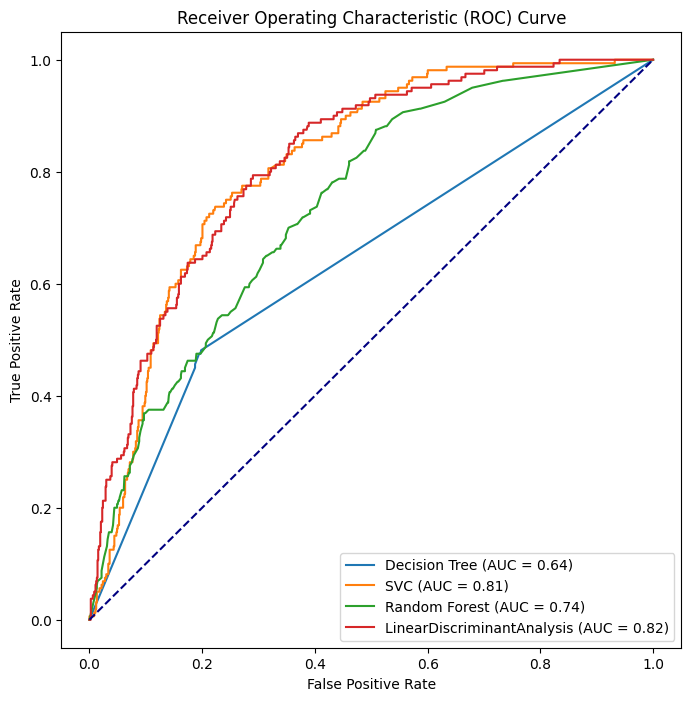

In [200]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report



fig, ax = plt.subplots(figsize=(8, 8))
roc_curve_data = {}

for model_name, classifier in models:
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier),
    ])

    pipeline.fit(X_train, y_train_encoded)

    y_score = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positive Rate':fpr,'True Positive Rate':tpr,'Threshold':threshold})
    roc_curve_data[model_name] = roc_curve_df
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.show()

In [201]:
from sklearn.metrics import confusion_matrix
forest_pipeline = all_pipeline['Random Forest']
forest_y_pred = forest_pipeline.predict(X_test)
matrix = confusion_matrix(y_test_encoded, forest_y_pred)

In [202]:
# Print the confusion matrix
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[686 152]
 [ 86  74]]


<Axes: >

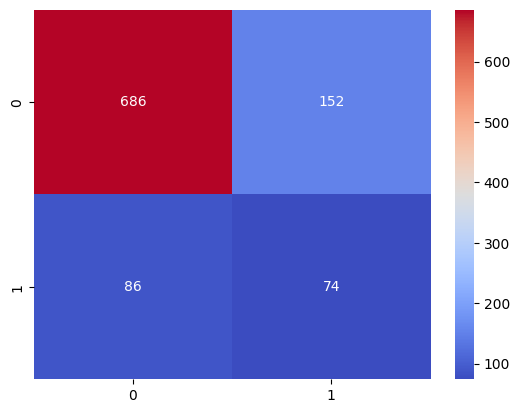

In [203]:
sns.heatmap(data=matrix,annot=True,fmt='d',cmap='coolwarm')

In [204]:
threshold = 0.02
y_pred_proba = forest_pipeline.predict_proba(X_test)[:,1]

binary_prediction = (y_pred_proba > threshold)
threshold_matrix = confusion_matrix(y_test_encoded,binary_prediction )
threshold_matrix

array([[310, 528],
       [ 12, 148]], dtype=int64)

<Axes: >

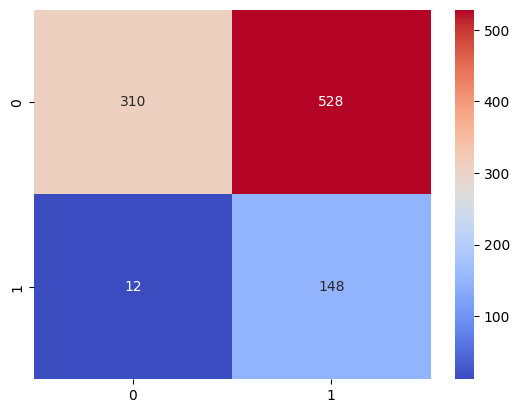

In [205]:
sns.heatmap(data=threshold_matrix,annot=True,fmt='d',cmap='coolwarm')

### Hyperparameter Tuning 

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


param_grid = {
    'feature_importance__k': ['all'],
    'classifier__n_estimators': [5],  # Corrected parameter name
    'classifier__max_depth': [None],
    'classifier__min_samples_split': [2]
}

grid_search = GridSearchCV(
    forest_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

grid_search.fit(X_train, y_train_encoded)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                                        ('categorical_pipeline',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strateg...
                                       ('smote', SMOTE(random_state=42)),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x0000018D84822840>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None],
                         'classifier__min_samples_split': [2],
                         'classifier__n_estimators': [5],
                         'feature_importance__k': ['all']},
             scoring='f1')

In [212]:
best_parametres = grid_search.best_params_
best_parametres

{'classifier__max_depth': None,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 5,
 'feature_importance__k': 'all'}

Retraining with best/optimum conditions/parameters

In [213]:
forest_pipeline.set_params(**best_parametres)
forest_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000018D84822840>)),
                ('classifier',
                 RandomForestClassifier(n_estimators=5, random_state=42))])

## Model Persistence

In [215]:
import os
import joblib

# Create the 'models' directory if it does not exist
models_directory = './models/'
os.makedirs(models_directory, exist_ok=True)

# Save the pipeline
joblib.dump(forest_pipeline, os.path.join(models_directory, 'finished_model.joblib'))

# Save the label encoder
joblib.dump(label_encoder, os.path.join(models_directory, 'encoder.joblib'))


['./models/encoder.joblib']